# Boston House Price Prediction

How does on actually predict a house price? There are several attributes that can be considerd such as year, rooms, size and so on. In this project i will create a Machine Learning Model which predicts Car Price based on its specifications.

The project will consist of the following flow:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
Visual correlation analysis
Statistical correlation analysis (Feature Selection)
Converting data to numeric for ML
Sampling and K-fold cross validation
Trying multiple Regression algorithms
Selecting the best Model
Deploying the best model in production


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)
from sklearn import metrics

sns.set()  #if you want to use seaborn themes with matplotlib functions

import warnings
warnings.filterwarnings('ignore')

In [2]:
# we use this rand_state = 1000 to keep getting the same data 
rand_state= 1000

In [3]:
df = pd.read_csv('BostonHousingData.csv')
df_boston =  pd.read_csv('BostonHousingData.csv')

In [4]:
# print first 5 rows of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Rows before deleting duplicates
print('Shape before deleting duplicate values:', df.shape)
# Removing duplicate rows if any

df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

# rename column MEDV to Prce
df.rename(columns={"MEDV": "price"}, inplace=True)

df.head(10)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Defining the problem statement:

**Create a ML model which can predict the price (MEDV) of a house**
- Traget Variable: MEDV
- Predictions: CRIM,ZN, INDUS, CHAS, NOX, RM, etc

# Determing the type of Machine Learning

Based on the problem statement you can understand taht we need to ccreate a **Supervised ML Regression Model**, as the target variable is Continous

## Looking at the dstribution of Target variable

- If the target variable's distribution is too skewed then teh predictive modelling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Regression, make sure the histrogram looks like a bell curve or slight skewed version of it. Otherwhite it impacts the Machine Learning algorithms ability to learn all the scenarios

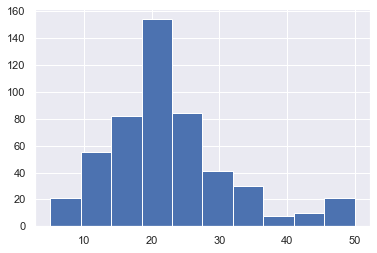

In [6]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
df['price'].hist()

# Basic Data Exploration

This step is performaed to guage the overal data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This steps helps to start the column rejection process. You must look at each column carefully and ask, does the column affect the values of the Target variable? For example in this case study, you will ask, **does this column afffect the price of the house?** If the asnwer is a clear "NO" then remove the column immediatly from the data, otherwise keep the column for feature analysis.

There are four commands which are used for Basic data exploration in Python

- **head()**: This helps to see a few sample rows of the data
- **info()**: This provides the summarized information of the data
- **describe()**: This provides the descriptive statistical details of the data
- **nuninque()**: This helps us to identify if a cn is categorical or continuous



In [7]:
# Looking at sample rows in the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [9]:
# Looking at the descriptive statistics of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, nothing down your observations regarding each column. Hence, creating a initial roadmap for further analyses.

The selected columns in this step are not final, further study will be done and then a final list will be created

- **CRIM** - Continuous. Selected. **Independent feature**
- **ZN** - Continuous. Selected. **Independent feature**
- **INDUS** - Continuous. Selected. **Independent feature**
- **CHAS** - Categorical. Selected. **Independent feature**
- **NOX** - Continuous. Selected. **Independent feature**
- **RM** - Continuous. Selected. **Independent feature**
- **AGE** - Continuous. Selected. **Independent feature**
- **DIS** - Continuous. Selected. **Independent feature**
- **RAD** - Categorical. Selected. **Independent feature**
- **TAX** - Continuous. Selected. **Independent feature**
- **PTRATIO** - Continuous. Selected. **Independent feature**
- **B** - Continuous. Selected. **Independent feature**
- **LSTAT** - Continuous. Selected. **Independent feature**
- **PRICE** - Continuous. Selected.THis is the **Target Variable, dependent feature**


# Removing useless columns from the data

There are no qualitative variables in the data

# Visual Exploratory Data Analysis

- Categorical variables: Bar plot
- Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted two categorical predictors in the data

**Categorical Predictors:** \
    - CHAS\
    - RAD
    
    
We use bar charts to see how the data is distributed for these categorical columns

In [11]:
# Plotting multiple bar char at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subpplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle("Bar charts of:" + str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

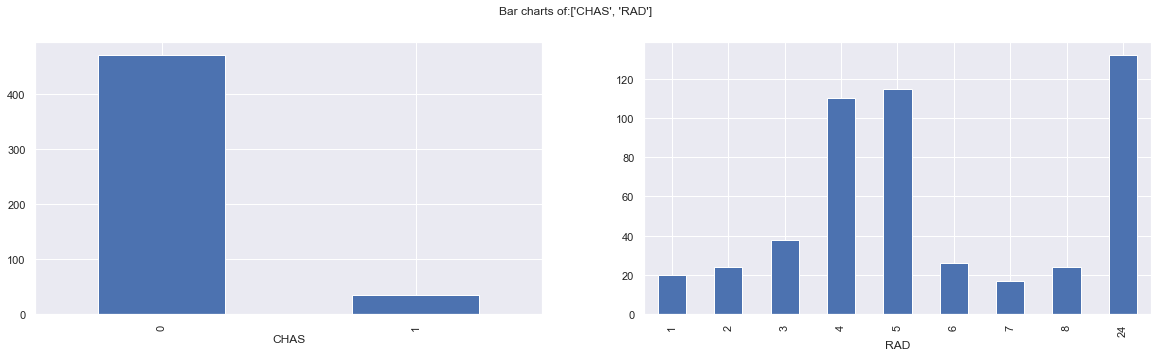

In [12]:
# Calling the function
categorical_features = ['CHAS','RAD']
PlotBarCharts(inpData=df, colsToPlot=categorical_features)

# Bar Charts Interpretation

These bar chats represent the frequencies of each category in the Y-axis and teh category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enougs for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other cateogires are present in very low numbers. These kind of columns mnot be very helpfull in machine learning. We confirm this in the correlation analysis section and tak a final call to select or reject the column.

In this data, "CHAS" is skewed. There is just one bar which is domination and other one has very less rows. Such columns may not be correlated wih the target variable because there no information to learn. The algorithms cannodn any rule like when the value is this then the target variable is that.

Whenever in doubt always investigate the column furter.

**Selected Categorical Variables**: Both the categorical variables are selected for further analysis. \
    -CHAS \
    -RAD

## Checking for Linearity by Scatterplots

Using scatter plots, let's take a look into the relationships between the variables and price. In order to create a linear model, the predictors or features that we use must have a linear relationship to price.

**Strong Possible Predictos** \ 
These features have strogn relationship to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot

### Number of rooms

Feature RM has a strong positive coorrelation, as the number of rooms increases/decreases, the housing price increases/decreases

Text(0.5, 1.0, 'Relationship between RM and Price')

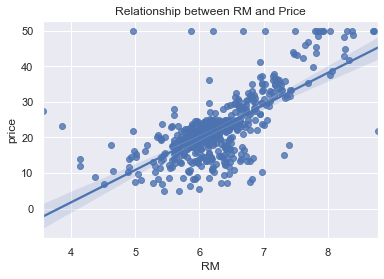

In [13]:
sns.regplot(y="price", x="RM", data=df, fit_reg = True)
plt.title("Relationship between RM and Price")

### % of Lower Status Population

Strong negative coorelation, the more/less the population consists of lower status individuals,housing price decreases/increases.

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

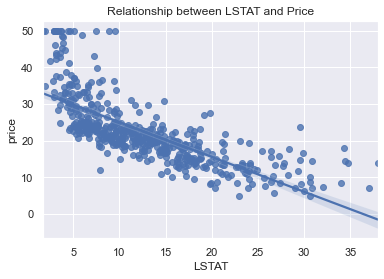

In [14]:
sns.regplot(y="price", x="LSTAT", data=df, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

### Nitrus Oxide Concentration (in parts per 10 million)

Strong negative coorelation, the more/less concentrated NOX is in the air, the lower/higher the price of housing.

Text(0.5, 1.0, 'Relationship between NOX and Price')

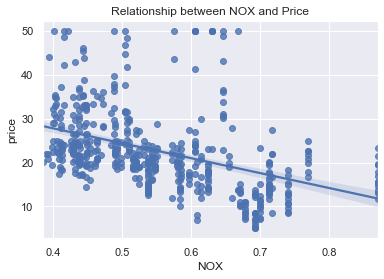

In [15]:
sns.regplot(y="price", x="NOX", data=df, fit_reg = True)
plt.title("Relationship between NOX and Price")

### Weighted Distance from 5 Major Employment Centers

Strong positive coorelation, the closer/further the town is from employment centers, the higher/lower the housing price.

Text(0.5, 1.0, 'Relationship between DIS and Price')

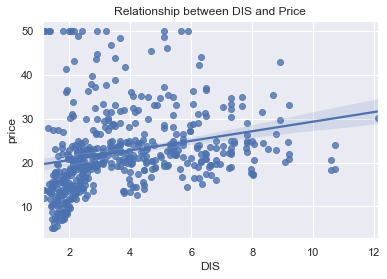

In [16]:
sns.regplot(y="price", x="DIS", data=df, fit_reg = True)
plt.title("Relationship between DIS and Price")

## Weaker (still decent) Possible Predictors:

These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

### Pupil Teacher Ratio

As the number of students increases for every teacher, the value of housing decreases

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

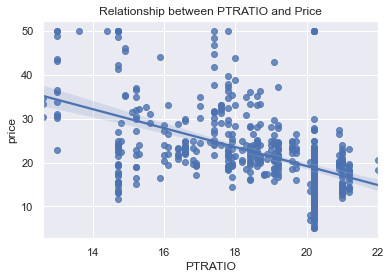

In [17]:
sns.regplot(y="price", x="PTRATIO", data=df, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

### Crime Rate

As them crime rate decreases/increases, the housing price increases/decreases.

Text(0.5, 1.0, 'Relationship between Crime Rate and Price')

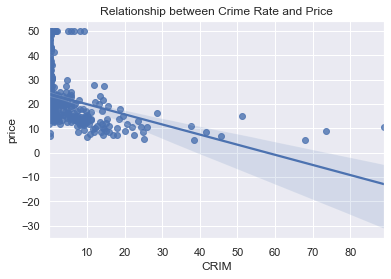

In [18]:
sns.regplot(y="price", x="CRIM", data=df, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")


# Visualize distribution of all the Continuous Predictor variables in the data using histrograms

Based on the Basic Data Exploration, there are eleven continuous predictor variables \
'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' and 'LSTAT'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E0C4D8850>,
      dtype=object)

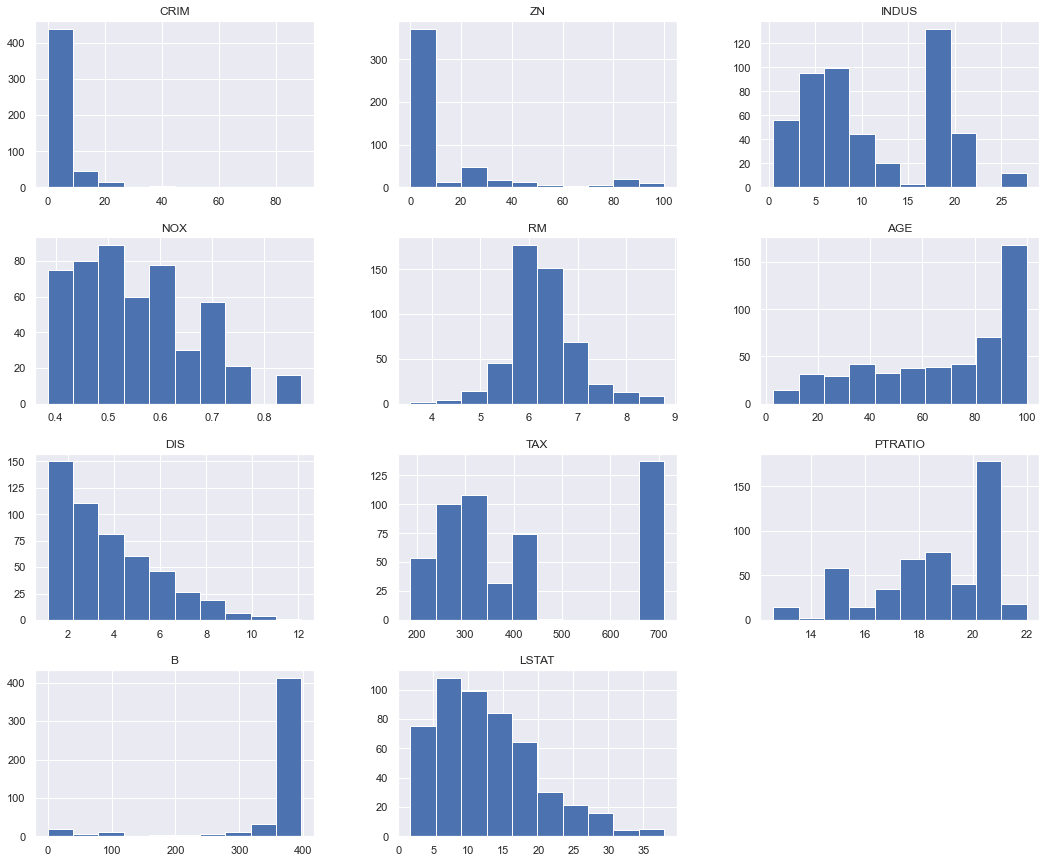

In [19]:
# Plotting histograms of multiple columns together
continuous_feature = df.drop(['CHAS', 'RAD', 'price'], axis=1).columns

df.hist(continuous_feature, figsize=(18,15))


## Histogram Interpretation

Histograms shows us the data distributfor a single continuous variable.

The X-axis shows the range of the values and Y-axis represent the number of values in that range. For example, in the above histrogram of "AGE", there are around 200 rows in data that age value between 90 to 100.

The ideal outcome for histrogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

- **CRIM** - Continuous. Ourliers beyond 40, need to treat them. **Independent feature**
- **ZN** - Continuous. The distribution is good. **Independent feature**
- **INDUS** - Continuous. The distribution is good. **Independent feature**
- **NOX** - Continuous. The distribution is good. **Independent feature**
- **RM** - Continuous. The distribution is good. **Independent feature**
- **AGE** - Continuous. The distribution is good. **Independent feature**
- **DIS** - Continuous. The distribution is good. **Independent feature**
- **TAX** - Continuous. The distribution is good. **Independent feature**
- **PTRATIO** - Continuous. The distribution is good. **Independent feature**
- **B** - Continuous. The distribution is good. **Independent feature**
- **LSTAT** - Continuous. The distribution is good. **Independent feature**

# Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the hisogram.

Outliers must be treated one column at the time. As the treatment willbe sligthly different for each column.

**Why should i treat the outliers?**

Ouliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the values with a logical business value

Below we are finding out the most logical value to be replaced of outliers by looking at the histrogram.



In [20]:
df_boston=df.copy()

#### Replacing outliers for dependent feature price

In [21]:
# log distribution for outliers >3%
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
price      1.108098
dtype: float64

In [22]:
# Replacing outliers with nearest possibe value
df['CRIM'] = np.log(df['CRIM'])

## Visualizing distribution before outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E0C5C0730>]],
      dtype=object)

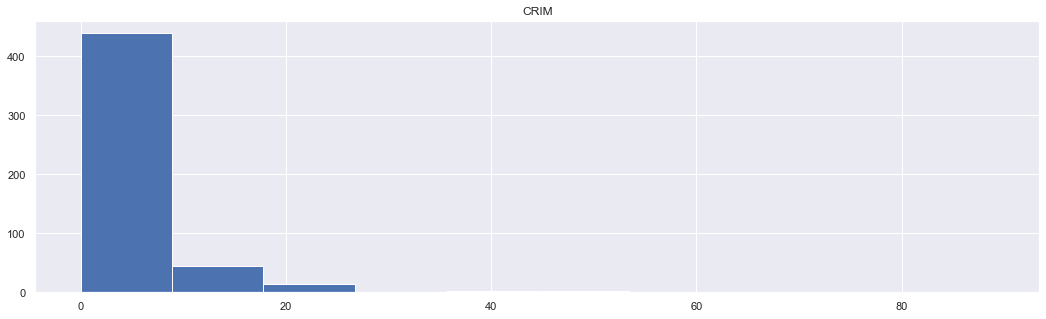

In [23]:
df_boston.hist(['CRIM'], figsize=(18,5))

In [24]:
df_boston['CRIM'].skew()

5.223148798243851

## Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E0C635A90>]],
      dtype=object)

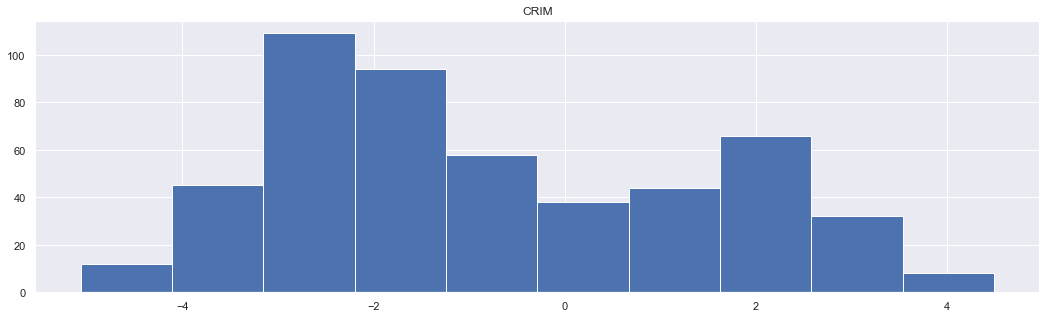

In [25]:
df.hist(['CRIM'], figsize=(18,5))

In [26]:
df['CRIM'].skew()

0.4059344988496048

#### we have applied log transformation to convert CRIM to a more standardized distribution and handled the skewness

#### Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [27]:
# Finding how many missing values are there for each column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

**No missing values in this data**

#### Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

#### Visual exploration of relationship between variables
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

#### Statistical measurement of relationship strength between variables
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present

- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

#### Relationship exploration: Continuous Vs Continuous, Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

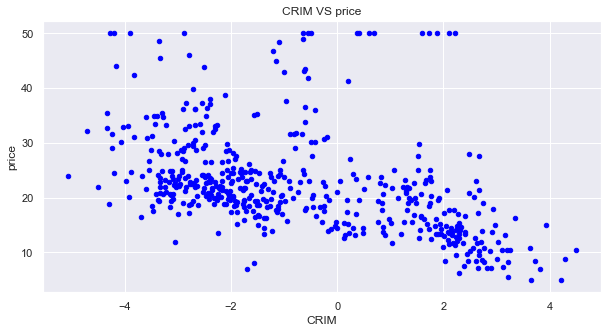

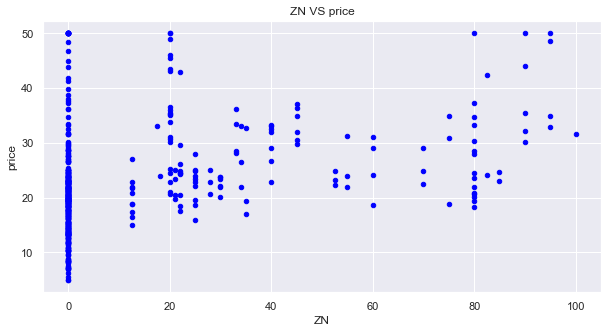

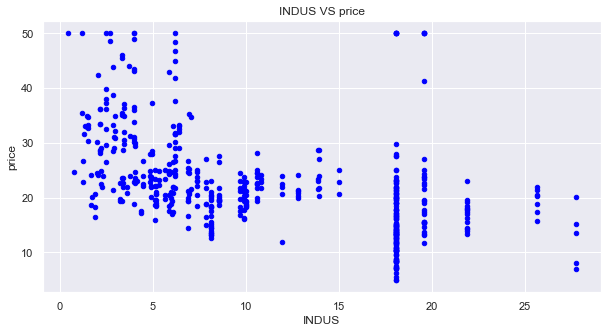

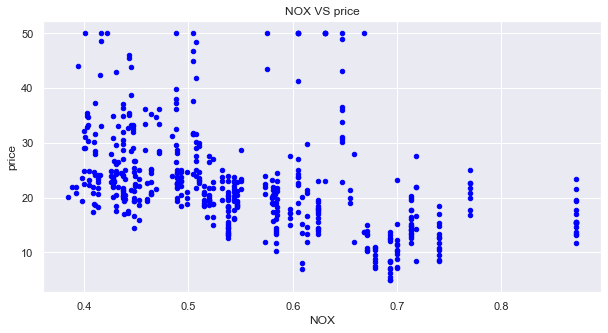

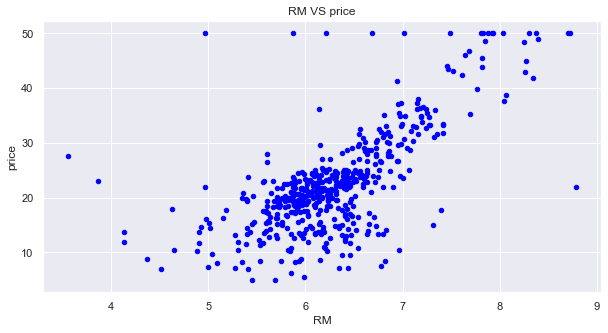

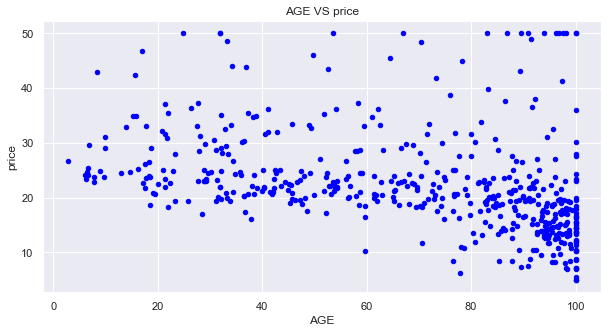

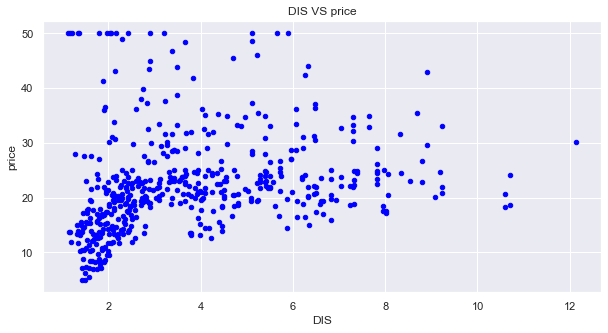

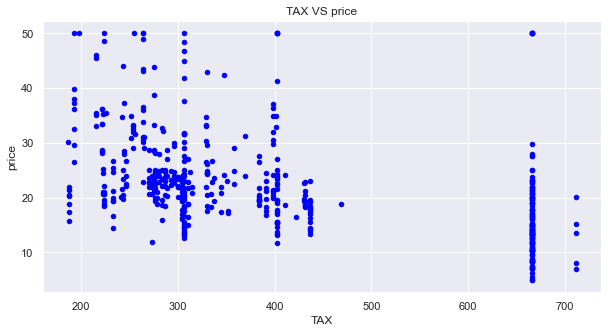

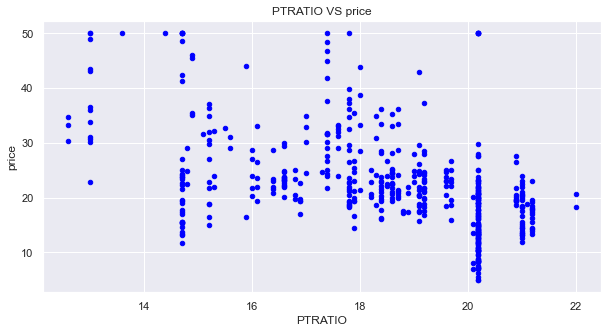

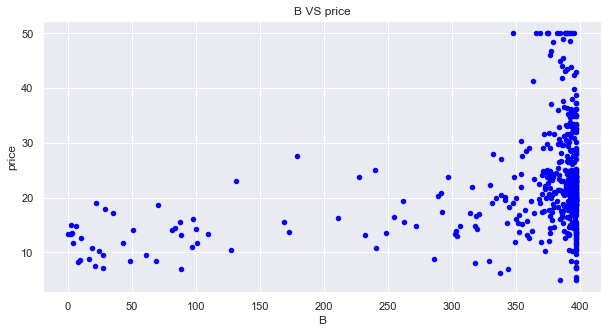

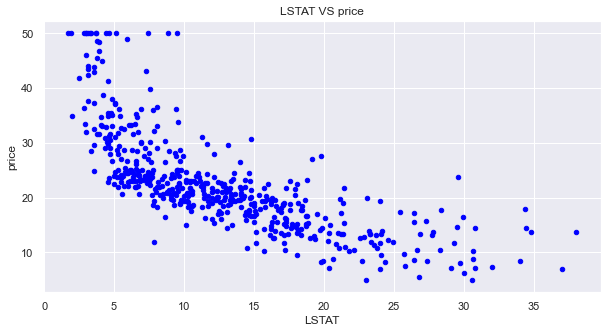

In [64]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', color='blue', figsize=(10,5), title=predictor+" VS "+ 'price')

#### Scatter chart interpretation

What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

1. Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for Machine Learning.
2. Decreasing Trend: this means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one values increases, other decreases. This is good for Machine Learning.
3. No Trend. You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. hence the predictor cannot be used for Machine Learning

Based on the above charts you can get a good idea about the predictor, if it will be  useful or not. You confirm this by looking at the correlation value.
    

## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as the covariance between two features  x  and  y  (numerator) divided by the product of their standard deviation

- This value can be calculated only between two numeric columns
- Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
- Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
- Correlation near {0} means No relationship, the scatter plot will show no clear trend.
- If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
- We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [29]:
# Calculating correlation matrix
ContinuousCols=['price','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,price,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.454302,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.454302,1.000000,-0.517091,0.730821,0.788616,-0.306943,0.658284,-0.681903,0.828234,0.389554,-0.478755,0.626615
ZN,0.360445,-0.517091,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.730821,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.788616,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.306943,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.658284,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.681903,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.828234,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.389554,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [30]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price      1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: price, dtype: float64

**Final selected Continuous columns:**

'price', 'RM', 'PTRATIO', 'LSTAT'

## Relationship exploration: Categorical Vs Continuous, Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

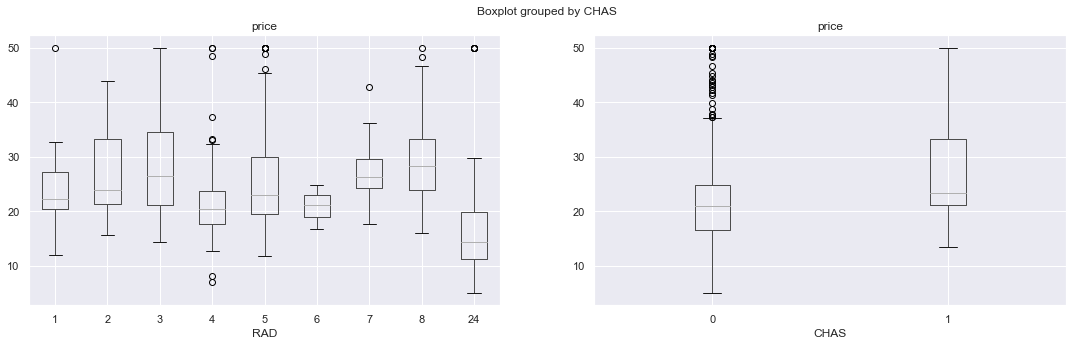

In [31]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['RAD', 'CHAS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Box-Plots interpretation

**What should you look for in these box plots?**

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

In this data, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
- ANOVA Test result: Probability of H0 being true

In [32]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [33]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAD', 'CHAS']
FunctionAnova(inpData=df, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with price | P-Value: 3.1256493316010175e-24
CHAS is correlated with price | P-Value: 7.390623170520815e-05


['RAD', 'CHAS']

### Selecting final predictors for Machine Learning

Basedon the above tests, selecting the final columns for our machine learning model

In [34]:
SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'CHAS']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1,0
1,6.421,17.8,9.14,2,0
2,7.185,17.8,4.03,2,0
3,6.998,18.7,2.94,3,0
4,7.147,18.7,5.33,3,0


In [35]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

- Converting each Ordinal Categorical columns to numeric
- Converting Binary nominal Categorical columns to numeric using 1/0 mapping
- Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

### Converting the ordinal variable to numeric

In this dataset there is no Ordinal categorical variable.

### Converting the binary nominal variable to numeric using 1/0 mapping

In this dataset there is no Ordinal categorical variable.

### Converting the nominal variable to numeric using get_dummies()

In [36]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=df['price']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,price
0,6.575,15.3,4.98,1,0,24.0
1,6.421,17.8,9.14,2,0,21.6
2,7.185,17.8,4.03,2,0,34.7
3,6.998,18.7,2.94,3,0,33.4
4,7.147,18.7,5.33,3,0,36.2


## Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [37]:
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'price'], dtype='object')

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='price' # dependent feature
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS'] # independent feature

X=DataForML_Numeric[Predictors].values # independent feautures
y=DataForML_Numeric[TargetVariable].values # dependent features

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [39]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X

array([[0.57750527, 0.28723404, 0.08967991, 0.        , 0.        ],
       [0.5479977 , 0.55319149, 0.2044702 , 0.04347826, 0.        ],
       [0.6943859 , 0.55319149, 0.06346578, 0.04347826, 0.        ],
       ...,
       [0.65433991, 0.89361702, 0.10789183, 0.        , 0.        ],
       [0.61946733, 0.89361702, 0.13107064, 0.        , 0.        ],
       [0.47307913, 0.89361702, 0.16970199, 0.        , 0.        ]])

In [41]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


# Multiple Linear Regression

In [42]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.6980461431155771

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            27.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            35.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            16.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            25.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            18.0
Mean Accuracy on test data: 81.80618534324392
Median Accuracy on test data: 88.88888888888889

Accuracy values for 10-fold Cross Validation:
 [88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]

Final Average Accuracy of the model: 78.98


In [43]:
results_df = pd.DataFrame(data=[["Linear Regression", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


# Decision Trees

DecisionTreeRegressor(max_depth=5)
R2 Value: 0.900709602721074

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            22.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            30.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            16.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            25.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            16.0
Mean Accuracy on test data: 84.90486272960791
Median Accuracy on test data: 89.73677103027029

Accuracy values for 10-fold Cross Validation:
 [87.26540355 91.67430612 87.50651521 86.87328743 87.954766   88.81654498
 88.56381116 59.35419294 74.27758535 73.54170234]

Final Average Accuracy of the model: 82.58


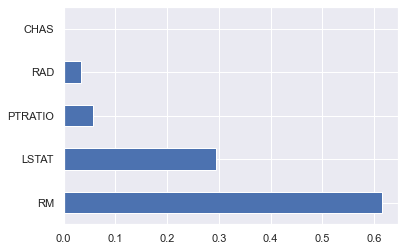

In [44]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [45]:
# appending the metrics to the dataframe
results_df_2 = pd.DataFrame(data=[["Decision Trees", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58


# Random Forest

RandomForestRegressor(max_depth=4, n_estimators=400)
R2 Value: 0.8950883027943621

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            22.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            32.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            17.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            24.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            16.0
Mean Accuracy on test data: 86.19177900856086
Median Accuracy on test data: 91.75257731958762

Accuracy values for 10-fold Cross Validation:
 [89.02074548 93.06991513 86.75658093 87.99379467 88.70541937 90.02792658
 86.30777645 62.33059835 73.07809682 80.53813469]

Final Average Accuracy of the model: 83.78


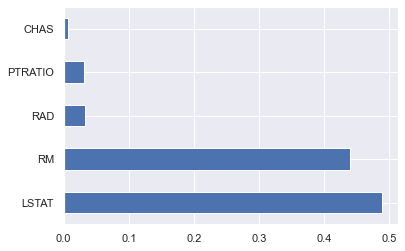

In [46]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [47]:
# appending the metrics to the dataframe
results_df_3 = pd.DataFrame(data=[["Random Forest", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58
2,Random Forest,83.78


# AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.8736449931671377

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            22.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            35.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            17.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            27.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            17.0
Mean Accuracy on test data: 82.9429253572234
Median Accuracy on test data: 87.4315529944669

Accuracy values for 10-fold Cross Validation:
 [86.77349039 88.80519467 87.67644806 86.60553146 87.07715418 86.70137
 81.13082272 57.80479682 70.53170403 80.10702244]

Final Average Accuracy of the model: 81.32


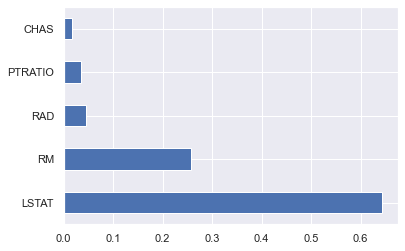

In [48]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [49]:
# appending the metrics to the dataframe
results_df_4 = pd.DataFrame(data=[["Ada Boost", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58
2,Random Forest,83.78
3,Ada Boost,81.32


# XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[19:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9873657311360539

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0

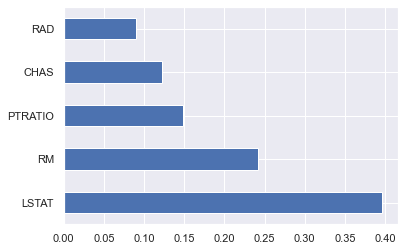

In [50]:
# XGBoost

# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [51]:
# appending the metrics to the dataframe
results_df_5 = pd.DataFrame(data=[["XGBoost", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58
2,Random Forest,83.78
3,Ada Boost,81.32
4,XGBoost,83.11


# KNN

In [52]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8876178537009081

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            25.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            34.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            16.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            23.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            15.0
Mean Accuracy on test data: 85.9476312344639
Median Accuracy on test data: 89.82758620689656

Accuracy values for 10-fold Cross Validation:
 [86.76784363 89.2951359  87.20118045 84.89757598 86.22512671 89.58047045
 88.19801647 61.55065249 75.95669044 78.49115516]

Final Average Accuracy of the model: 82.82


In [53]:
# appending the metrics to the dataframe
results_df_6 = pd.DataFrame(data=[["KNN", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58
2,Random Forest,83.78
3,Ada Boost,81.32
4,XGBoost,83.11
5,KNN,82.82


# SVM

In [54]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.5983386449495731

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  price  Predictedprice
0  0.547040  0.425532  0.201711  0.173913   0.0   23.6            25.0
1  0.612569  0.531915  0.049669  0.130435   1.0   32.4            30.0
2  0.464074  0.797872  0.450883  0.130435   0.0   13.6            18.0
3  0.479785  0.702128  0.104581  0.130435   0.0   22.8            24.0
4  0.524238  0.808511  0.428808  1.000000   0.0   16.1            16.0
Mean Accuracy on test data: 83.34072262551857
Median Accuracy on test data: 88.8888888888889

Accuracy values for 10-fold Cross Validation:
 [88.37420022 91.4513705  87.68143773 79.82823369 86.15226484 83.80493943
 88.12447341 61.52166008 63.3626039  80.79728051]

Final Average Accuracy of the model: 81.11


## Visualizing the accuracy of the Machine Learning Models

In [55]:
# appending the metrics to the dataframe
results_df_7 = pd.DataFrame(data=[["SVM", round(Accuracy_Values.mean(),2)]], 
                          columns=['Model','Accuracy'])


results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Accuracy
0,Linear Regression,78.98
1,Decision Trees,82.58
2,Random Forest,83.78
3,Ada Boost,81.32
4,XGBoost,83.11
5,KNN,82.82
6,SVM,81.11


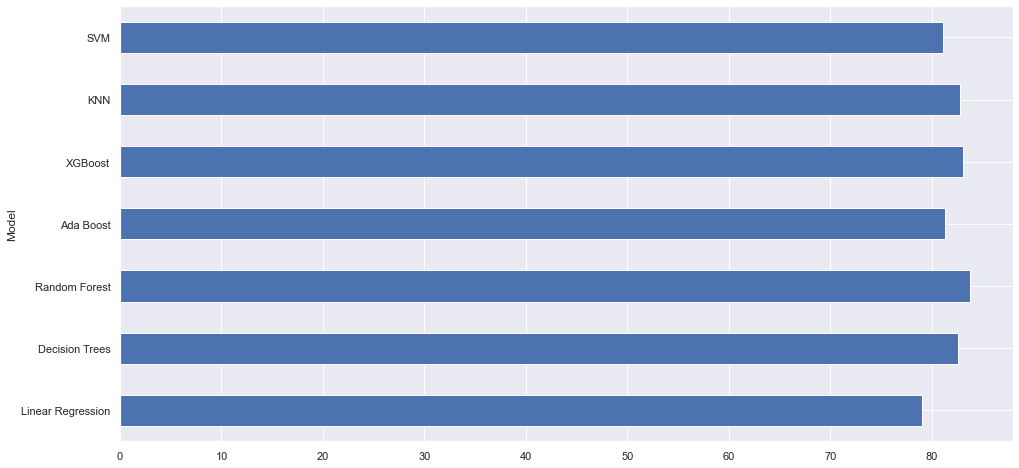

In [56]:

results_df.set_index('Model', inplace=True)
results_df['Accuracy'].plot(kind='barh', figsize=(16, 8))

# Deployment of our model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing **XGboost** as the final model as on overal datasets it produces a high accuracy

In order to deploy the model we follow below steps

1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [57]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['LSTAT', 'RM', 'PTRATIO']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(506, 3)
(506,)


**Cross validating the final model accuracy with less predictors**

In [58]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[19:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

#### Step 1. Retraining the model using 100% data


In [59]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

[19:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\prash\Desktop\Machine Learning Projects\House Price Prediction


In [61]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['LSTAT', 'RM', 'PTRATIO']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [62]:
# Calling the function for some loan applications
NewSampleData=pd.DataFrame(
data=[[4.98,6.575,15.3],
     [4.98,3.2,10.3]],
columns=['LSTAT', 'RM', 'PTRATIO'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   4.98  3.200     10.3


,Prediction
0,25.846903
1,23.979792


The Function FunctionPredictResult() can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the loan applications available in the system.

In [63]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_LSTAT , inp_RM, inp_PTRATIO):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_LSTAT , inp_RM, inp_PTRATIO]],
     columns=['LSTAT', 'RM', 'PTRATIO'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_LSTAT=4.98,
                           inp_RM=6.5,
                           inp_PTRATIO=15.3
                             )

'{"Prediction":{"0":25.5554847717}}'